<a href="https://colab.research.google.com/github/sunny0103/online_course_or_book_reviewnote/blob/main/Deep_Learning_from_Scratch/Deep_Learning_from_Scratch1/%5BDeep_Learning_from_Scratch%5D_Mnist_%EA%B5%AC%ED%98%84_Numerical_Gradient_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mnist Data

## data load and import libraries

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
mnist = load_digits()

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
pd.DataFrame(mnist.data, columns=mnist.feature_names).head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


In [ ]:
print('train data shape:',mnist.data.shape)
print('target data shape:',mnist.target.shape)

train data shape: (1797, 64)
target data shape: (1797,)


In [ ]:
print('data minimum:',mnist.data.min())
print('data maximum:',mnist.data.max())

data minimum: 0.0
data maximum: 16.0


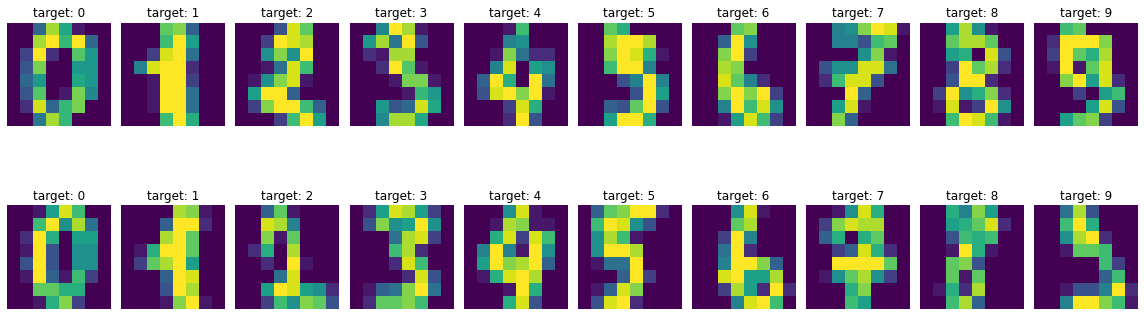

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i]);
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()
# from https://h1ros.github.io/posts/loading-scikit-learns-mnist-dataset/

## Dataset modification


In [ ]:
# change dataset name to X and y
X = mnist.data
y = mnist.target

* Min-Max Standardization
$X_{Stand} =\frac{value-min}{max-min}$

In [ ]:
# min-max standadization
X/=16.0

In [ ]:
print(X.min(), X.max())

0.0 1.0


In [ ]:
# Split dataset into 3 : train, validation, and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


In [ ]:
np.random.seed(0) # set seed
print(np.random.randint(3)) # 0~2까지 랜덤 int 생성
print(np.random.randn(3,2)) # standard noraml distribution with (m,n) array

0
[[ 1.12279492  0.30280522]
 [ 0.07085926  0.07304142]
 [-1.42232584  1.52006949]]


## 2 layer- sigmoid using Numerical gradient

In [ ]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [ ]:
def cross_entropy_error(y, labels):
    if y.ndim == 1:
        labels = labels.reshape(1, labels.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if labels.size == y.size:
        labels = labels.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), labels])) / batch_size

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()

    return grad

In [ ]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, ouput_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, ouput_size)
        self.params['b2'] = np.zeros(ouput_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        z1 = np.dot(x, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) +b2
        y = softmax(z2)
        return y
    
    # x:입력 데이터 labels: 정답
    def loss(self, x, labels):
        y = self.predict(x)
        return cross_entropy_error(y, labels)
    
    def accuracy(self, x, labels):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        accuracy = np.sum(y == labels)/x.shape[0]
        return accuracy
    
    def numerical_gradient(self, x, lables):
        loss_W = lambda W :self.loss(x, lables)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [ ]:
net =TwoLayerNet(input_size=64 ,hidden_size=32, ouput_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(64, 32)
(32,)
(32, 10)
(10,)


In [ ]:
train_loss_list=[]
iters_num= 1000 # 반복횟수
train_size = X_train.shape[0]
batch_size = 100 # 미니배치 사이즈
learning_rate = 0.1
network = TwoLayerNet(input_size=64 ,hidden_size=32, ouput_size=10)

In [ ]:
for i in range(iters_num):
    # 미니 배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, y_batch)
    
    # 매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)

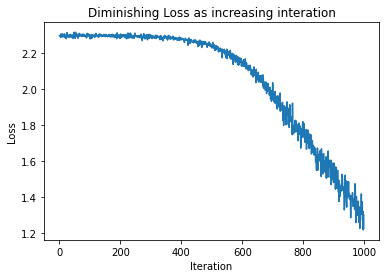

In [ ]:
plt.plot(train_loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Diminishing Loss as increasing interation')
plt.show()


## 2 layer- sigmoid with validation dataset

In [ ]:
train_loss_list=[]
train_acc_list = []
test_acc_list = []

iters_num= 1000 # 반복횟수
train_size = X_train.shape[0]
batch_size = 100 # 미니배치 사이즈
learning_rate = 0.1

network = TwoLayerNet(input_size=64 ,hidden_size=32, ouput_size=10)

In [ ]:
# 1 epoch당 반복수
iter_per_epoch = int(max(train_size/batch_size, 1))

In [ ]:
for i in range(iters_num):
    # 미니 배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, y_batch)
    
    # 매개변수 갱신
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
      train_acc = network.accuracy(X_train, y_train)
      test_acc = network.accuracy(X_test, y_test)
      train_acc_list.append(train_acc)
      test_acc_list.append(test_acc)
      print("train accuracy{:.3f}, test accuracy:{:.3f}".format(train_acc, test_acc))


train accuracy0.098, test accuracy:0.114
train accuracy0.101, test accuracy:0.103
train accuracy0.106, test accuracy:0.078
train accuracy0.099, test accuracy:0.106
train accuracy0.106, test accuracy:0.078
train accuracy0.106, test accuracy:0.078
train accuracy0.101, test accuracy:0.103
train accuracy0.106, test accuracy:0.078
train accuracy0.098, test accuracy:0.114
train accuracy0.106, test accuracy:0.078
train accuracy0.101, test accuracy:0.103
train accuracy0.101, test accuracy:0.103
train accuracy0.104, test accuracy:0.069
train accuracy0.101, test accuracy:0.103
train accuracy0.100, test accuracy:0.103
train accuracy0.101, test accuracy:0.103
train accuracy0.102, test accuracy:0.092
train accuracy0.106, test accuracy:0.078
train accuracy0.249, test accuracy:0.231
train accuracy0.098, test accuracy:0.114
train accuracy0.098, test accuracy:0.114
train accuracy0.100, test accuracy:0.103
train accuracy0.098, test accuracy:0.114
train accuracy0.098, test accuracy:0.114
train accuracy0.

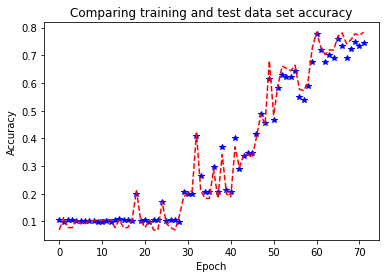

In [ ]:
plt.plot(train_acc_list,'-b')
plt.plot(test_acc_list,'--r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparing training and test data set accuracy')
plt.show()

***학습이 진행될수록 훈련데이터와 시험 데이터의 정확도가 좋아지고 있다. 두 데이터 정확도의 차이가 거의 없으므로 오버피팅이 일어나지 않았다. 오버피팅이 일어나면 어느 순간 테스트 데이터 셋의 정확도가 점차 떨어지기 시작한다.***